In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [59]:
df = pd.read_csv('244400404_effectifs-eleves-cleaned')
df.head()

,RowNo,Type de site,Date,Prévision,Réel,Nom du site,An,RéelMed,RéelNorm
0,0,M/E,2011-09-06,290.0,271.0,LEDRU ROLLIN/SARAH BERNHARDT,2011,308.0,0.879870
1,1,M/E,2011-09-05,95.0,102.0,BEAUJOIRE,2011,129.0,0.790698
2,2,M/E,2011-09-05,167.0,171.0,CONTRIE,2011,211.0,0.810427
3,3,M,2011-09-05,80.0,64.0,COUDRAY M.,2011,77.0,0.831169
4,4,M,2011-09-05,73.0,77.0,FONTENY,2011,92.0,0.836957


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127169 entries, 0 to 127168
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   RowNo         127169 non-null  int64  
 1   Type de site  127169 non-null  object 
 2   Date          127169 non-null  object 
 3   Prévision     126219 non-null  float64
 4   Réel          127169 non-null  float64
 5   Nom du site   127169 non-null  object 
 6   An            127169 non-null  int64  
 7   RéelMed       127169 non-null  float64
 8   RéelNorm      127169 non-null  float64
dtypes: float64(4), int64(2), object(3)
memory usage: 8.7+ MB


In [61]:
df.describe()

,RowNo,Prévision,Réel,An,RéelMed,RéelNorm
count,127169.000000,126219.000000,127169.000000,127169.000000,127169.000000,127169.000000
mean,65176.304091,165.353291,158.914279,2016.147953,161.016486,0.992389
std,37609.280964,84.114759,80.935278,3.332226,79.550386,0.163674
min,0.000000,0.000000,11.000000,2011.000000,45.000000,0.200334
25%,32614.000000,104.000000,97.000000,2013.000000,102.000000,0.938224
50%,65183.000000,148.000000,141.000000,2016.000000,142.000000,1.000000
75%,97706.000000,218.000000,209.000000,2019.000000,213.000000,1.057034
max,130307.000000,6236.000000,591.000000,2022.000000,510.000000,1.991304


In [62]:
df.keys()

Index(['RowNo', 'Type de site', 'Date', 'Prévision', 'Réel', 'Nom du site',
       'An', 'RéelMed', 'RéelNorm'],
      dtype='object')

In [63]:
df_group = df.groupby('Nom du site')
df_desc = df_group[['Prévision', 'Réel', 'RéelNorm']].describe()
df_desc

Prévision                               \
                                      count        mean        std   min   
Nom du site                                                                
AGENETS                              1480.0  291.426351  36.498891   0.0   
AIME CESAIRE                         1236.0  195.998382  70.275824   1.0   
ALAIN FOURNIER                       1003.0   77.915254  13.482886  31.0   
ALAIN FOURNIER E                      937.0  133.729989  54.757748   0.0   
ALAIN FOURNIER M                      458.0   61.626638  11.852592  16.0   
...                                     ...         ...        ...   ...   
STALINGRAD/FOYER MANU                   0.0         NaN        NaN   NaN   
STALINGRAD/FOYER MANU(dépannage )       0.0         NaN        NaN   NaN   
SULLY                                1482.0  296.078947  26.403504  94.0   
URBAIN LE VERRIER                    1452.0  221.579890  72.817984  75.0   
VILLA MARIA                          1480.0  114.075000  15.351872  41.0   

                                                                  Réel  \
                                     25%    50%    75%     max   count   
Nom du site                                                              
AGENETS                            274.0  287.0  305.0   601.0  1480.0   
AIME CESAIRE                       143.0  212.0  245.0   459.0  1236.0   
ALAIN FOURNIER                      67.0   77.0   87.0   119.0  1003.0   
ALAIN FOURNIER E                    80.0  124.0  180.0   230.0   937.0   
ALAIN FOURNIER M                    51.0   61.0   68.0    89.0   458.0   
...                                  ...    ...    ...     ...     ...   
STALINGRAD/FOYER MANU                NaN    NaN    NaN     NaN   124.0   
STALINGRAD/FOYER MANU(dépannage )    NaN    NaN    NaN     NaN   273.0   
SULLY                              288.0  301.0  309.0   345.0  1482.0   
URBAIN LE VERRIER                  202.0  220.0  236.0  2060.0  1452.0   
VILLA MARIA                        107.0  114.0  121.0   374.0  1480.0   

                                               ...               RéelNorm  \
                                         mean  ...    75%    max    count   
Nom du site                                    ...                          
AGENETS                            277.524324  ...  301.0  408.0   1480.0   
AIME CESAIRE                       187.775081  ...  245.0  345.0   1236.0   
ALAIN FOURNIER                      69.428714  ...   80.0  123.0   1003.0   
ALAIN FOURNIER E                   118.885806  ...  153.0  250.0    937.0   
ALAIN FOURNIER M                    56.770742  ...   64.0   98.0    458.0   
...                                       ...  ...    ...    ...      ...   
STALINGRAD/FOYER MANU              106.379032  ...  114.0  125.0    124.0   
STALINGRAD/FOYER MANU(dépannage )  102.175824  ...  108.0  113.0    273.0   
SULLY                              291.587045  ...  318.0  348.0   1482.0   
URBAIN LE VERRIER                  209.563361  ...  231.0  325.0   1452.0   
VILLA MARIA                        109.135811  ...  118.0  153.0   1480.0   

                                                                           \
                                       mean       std       min       25%   
Nom du site                                                                 
AGENETS                            0.973231  0.131466  0.249267  0.963793   
AIME CESAIRE                       1.006607  0.179690  0.212355  0.952174   
ALAIN FOURNIER                     0.988568  0.220715  0.258503  0.804186   
ALAIN FOURNIER E                   1.043914  0.280954  0.219178  0.902778   
ALAIN FOURNIER M                   1.065608  0.222026  0.231579  0.913793   
...                                     ...       ...       ...       ...   
STALINGRAD/FOYER MANU              0.998864  0.099864  0.572770  0.948357   
STALINGRAD/FOYER MANU(dépannage )  0.991373  0.082550  0.471698  0.970000   
SULLY 

In [64]:
df_stat = df_desc.unstack()
df_stat

                  Nom du site                      
Prévision  count  AGENETS                              1480.000000
                  AIME CESAIRE                         1236.000000
                  ALAIN FOURNIER                       1003.000000
                  ALAIN FOURNIER E                      937.000000
                  ALAIN FOURNIER M                      458.000000
                                                          ...     
RéelNorm   max    STALINGRAD/FOYER MANU                   1.173709
                  STALINGRAD/FOYER MANU(dépannage )       1.130000
                  SULLY                                   1.208406
                  URBAIN LE VERRIER                       1.469388
                  VILLA MARIA                             1.264463
Length: 2496, dtype: float64

In [65]:
df_stat[('Réel','mean','VILLA MARIA')]

109.13581081081081

In [66]:
df_stat[('Réel','mean')]

Nom du site
AGENETS                              277.524324
AIME CESAIRE                         187.775081
ALAIN FOURNIER                        69.428714
ALAIN FOURNIER E                     118.885806
ALAIN FOURNIER M                      56.770742
                                        ...    
STALINGRAD/FOYER MANU                106.379032
STALINGRAD/FOYER MANU(dépannage )    102.175824
SULLY                                291.587045
URBAIN LE VERRIER                    209.563361
VILLA MARIA                          109.135811
Length: 104, dtype: float64

In [67]:
df_stat[('Réel','mean')][0]

277.5243243243243

In [68]:
df_stat[('Réel','mean')].keys()

Index(['AGENETS', 'AIME CESAIRE', 'ALAIN FOURNIER', 'ALAIN FOURNIER E',
       'ALAIN FOURNIER M', 'ALPHONSE BRAUD', 'AMPERE', 'ANATOLE DE MONZIE',
       'ANDRE LERMITE/LAMORICIERE', 'ANGE GUEPIN',
       ...
       'RUE NOIRE', 'STALINGRAD', 'STALINGRAD (Foyer Manu)', 'STALINGRAD E',
       'STALINGRAD M', 'STALINGRAD/FOYER MANU',
       'STALINGRAD/FOYER MANU(dépannage )', 'SULLY', 'URBAIN LE VERRIER',
       'VILLA MARIA'],
      dtype='object', name='Nom du site', length=104)

<BarContainer object of 104 artists>

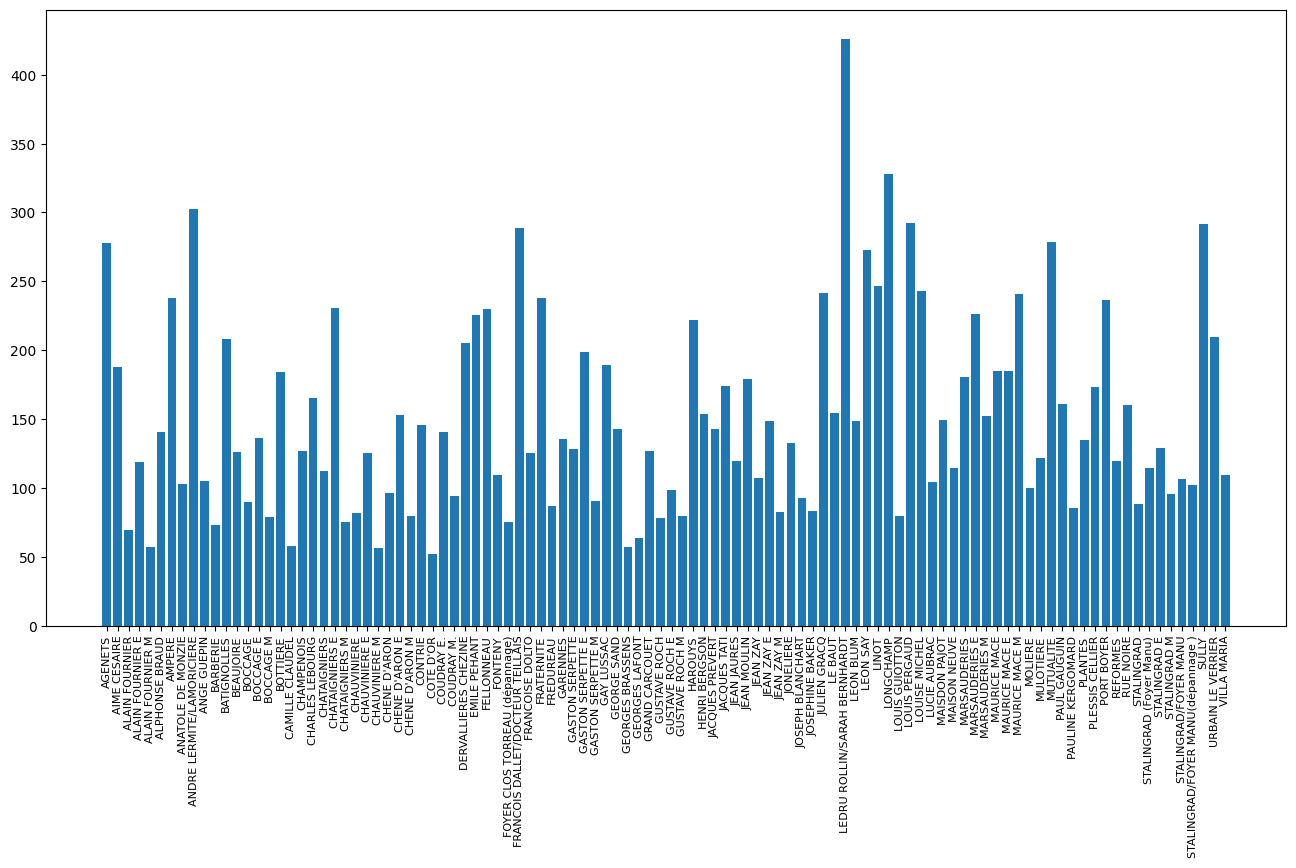

In [69]:
plt.figure(figsize=(16,8))
plt.xticks(rotation=90, fontsize=8)
plt.bar(x = df_stat[('Réel','mean')].keys(),height = df_stat[('Réel','mean')])

In [70]:
df['an']=df['Date'].apply(lambda string1 : int(string1[:4]))

In [71]:
df['mois']=df['Date'].apply(lambda string1 : int(string1[5:7]))

In [72]:
df['jour']=df['Date'].apply(lambda string1 : int(string1[-2:]))

In [73]:
df['joursem']= df['Date'].apply( lambda string1 :datetime.datetime.strptime(string1,"%Y-%m-%d").weekday())

In [74]:
df.joursem.value_counts()

4    32331
1    31907
0    31549
3    30679
2      703
Name: joursem, dtype: int64

In [75]:
df['isoweek']= df['Date'].apply( lambda string1 :datetime.datetime.strptime(string1,"%Y-%m-%d").isocalendar().week)

In [76]:
df.head()

,RowNo,Type de site,Date,Prévision,Réel,Nom du site,An,RéelMed,RéelNorm,an,mois,jour,joursem,isoweek
0,0,M/E,2011-09-06,290.0,271.0,LEDRU ROLLIN/SARAH BERNHARDT,2011,308.0,0.879870,2011,9,6,1,36
1,1,M/E,2011-09-05,95.0,102.0,BEAUJOIRE,2011,129.0,0.790698,2011,9,5,0,36
2,2,M/E,2011-09-05,167.0,171.0,CONTRIE,2011,211.0,0.810427,2011,9,5,0,36
3,3,M,2011-09-05,80.0,64.0,COUDRAY M.,2011,77.0,0.831169,2011,9,5,0,36
4,4,M,2011-09-05,73.0,77.0,FONTENY,2011,92.0,0.836957,2011,9,5,0,36


In [77]:
df_mois = df.groupby('mois')
df_descmois = df_mois.describe()
df_descmois

RowNo                                                         \
        count          mean           std     min       25%      50%   
mois                                                                   
1     15985.0  64863.443103  37709.119909   772.0  32239.00  64952.0   
2     10512.0  64981.052892  37696.126102   601.0  32108.75  64765.5   
3     13068.0  64770.009336  37424.872848   478.0  32020.50  64680.5   
4      9403.0  64853.039987  37729.642711   338.0  31805.50  64496.0   
5     12072.0  65279.842031  37622.471038   200.0  31700.75  66763.0   
6     14589.0  65324.569950  37242.547345    29.0  33744.00  64326.0   
7      2627.0  65573.468976  36190.166396    16.0  36455.50  65795.0   
9     15358.0  65604.729392  37601.258004     0.0  33511.25  65667.5   
10    10053.0  65274.777479  37926.608087  1450.0  32657.00  65250.0   
11    13695.0  65166.354144  37709.561356  1058.0  32485.50  65138.0   
12     9807.0  65534.509330  37931.923091   963.0  32341.00  66709.0   

                         Prévision              ... joursem       isoweek  \
           75%       max     count        mean  ...     75%  max    count   
mois                                            ...                         
1     97734.00  129599.0   15870.0  166.653686  ...     3.0  4.0  15985.0   
2     98561.25  129447.0   10425.0  165.515588  ...     4.0  4.0  10512.0   
3     98439.25  129318.0   12976.0  167.716091  ...     4.0  4.0  13068.0   
4     97304.50  129189.0    9321.0  163.940779  ...     4.0  4.0   9403.0   
5     99159.25  129073.0   11978.0  164.264234  ...     3.0  4.0  12072.0   
6     97050.00  130307.0   14477.0  155.602197  ...     4.0  4.0  14589.0   
7     96576.50  130250.0    2613.0  160.494834  ...     4.0  4.0   2627.0   
9     97975.75  130215.0   15245.0  164.806166  ...     4.0  4.0  15358.0   
10    96368.00  130043.0    9972.0  167.365022  ...     4.0  4.0  10053.0   
11    96172.50  129917.0   13601.0  169.777075  ...     3.0  4.0  13695.0   
12    99834.50  129742.0    9741.0  171.019608  ...     4.0  4.0   9807.0   

                                                         
           mean       std   min   25%   50%   75%   max  
mois                                                     
1      3.022896  1.223611   1.0   2.0   3.0   4.0   5.0  
2      6.803463  1.306146   5.0   6.0   7.0   8.0   9.0  
3     11.384604  1.228690   9.0  10.0  11.0  12.0  14.0  
4     15.483144  1.399094  13.0  14.0  15.0  17.0  18.0  
5     20.143804  1.256591  18.0  19.0  20.0  21.0  22.0  
6     24.408870  1.281528  22.0  23.0  24.0  25.0  27.0  
7     26.871336  0.334891  26.0  27.0  27.0  27.0  27.0  
9     37.585167  1.246787  35.0  37.0  38.0  39.0  40.0  
10    41.061574  0.889368  39.0  40.0  41.0  42.0  43.0  
11    46.466521  1.182129  44.0  45.0  47.0  47.0  49.0  
12    49.815540  0.896392  48.0  49.0  50.0  51.0  51.0  

[11 rows x 80 columns]

array([[<AxesSubplot:title={'center':'RéelNorm'}>]], dtype=object)

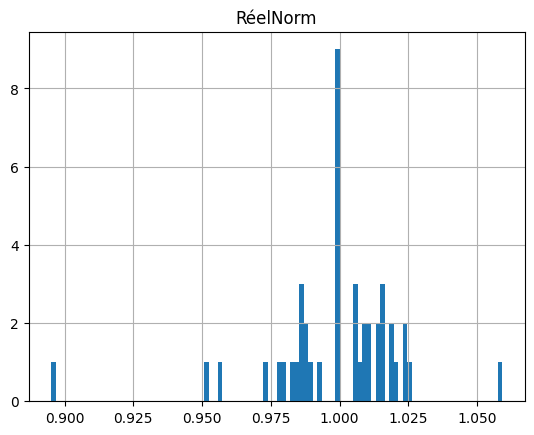

In [78]:
df_NormVsIsow = df[['isoweek','RéelNorm']].groupby('isoweek').median()
df_NormVsIsow.hist(bins=100)

<AxesSubplot:xlabel='isoweek'>

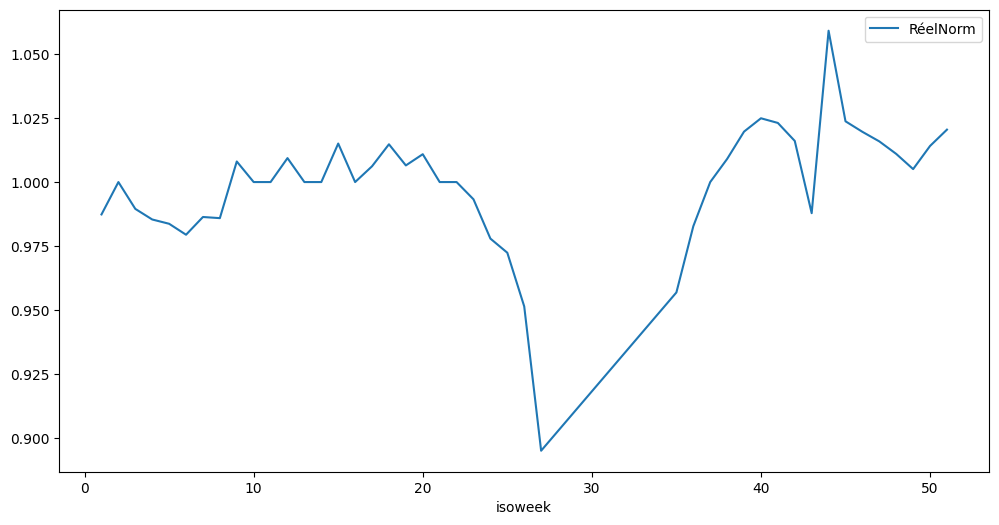

In [79]:
df_NormVsIsow.plot(figsize=(12,6))

faire avec Réel au lieu de Norm
Evolution annuelle


<AxesSubplot:xlabel='isoweek'>

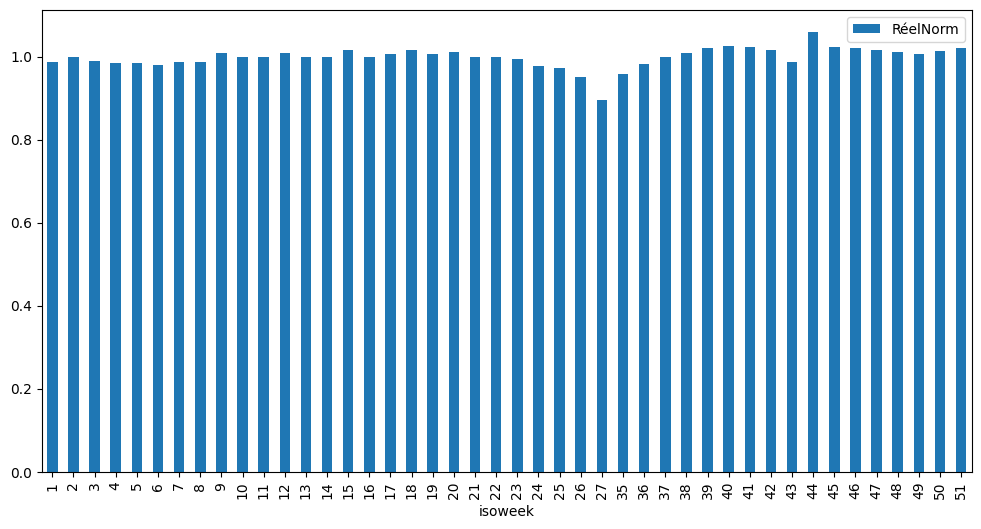

In [80]:
df_NormVsIsow.plot(kind='bar', figsize=(12,6))

<AxesSubplot:xlabel='isoweek'>

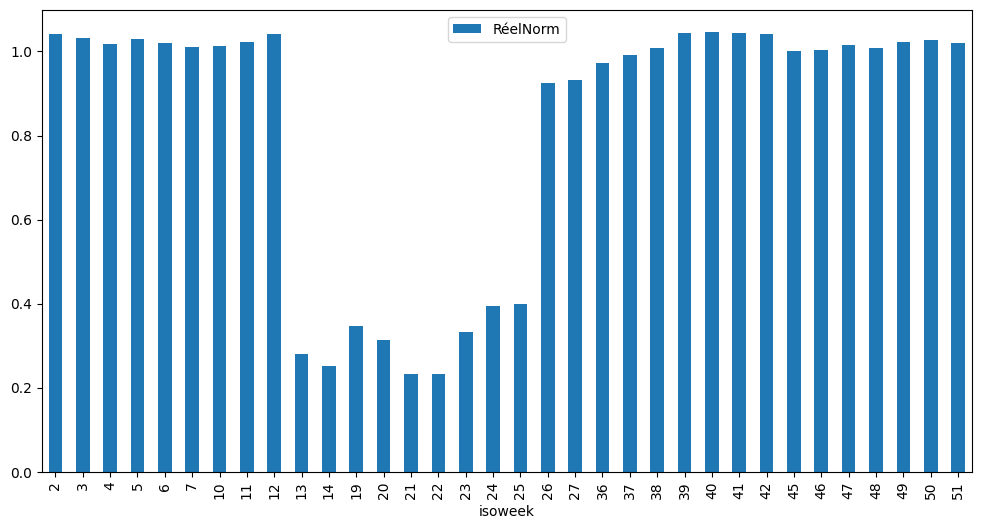

In [81]:
df[df['an']==2020][['isoweek','RéelNorm']].groupby('isoweek').median().plot(kind='bar', figsize=(12,6))


<AxesSubplot:xlabel='isoweek'>

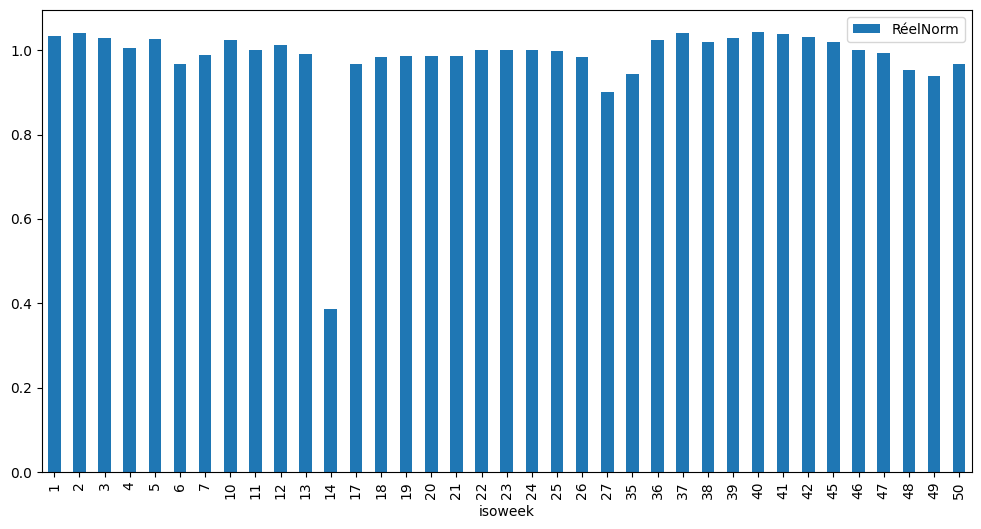

In [82]:
df[df['an']==2021][['isoweek','RéelNorm']].groupby('isoweek').median().plot(kind='bar', figsize=(12,6))

<AxesSubplot:xlabel='isoweek'>

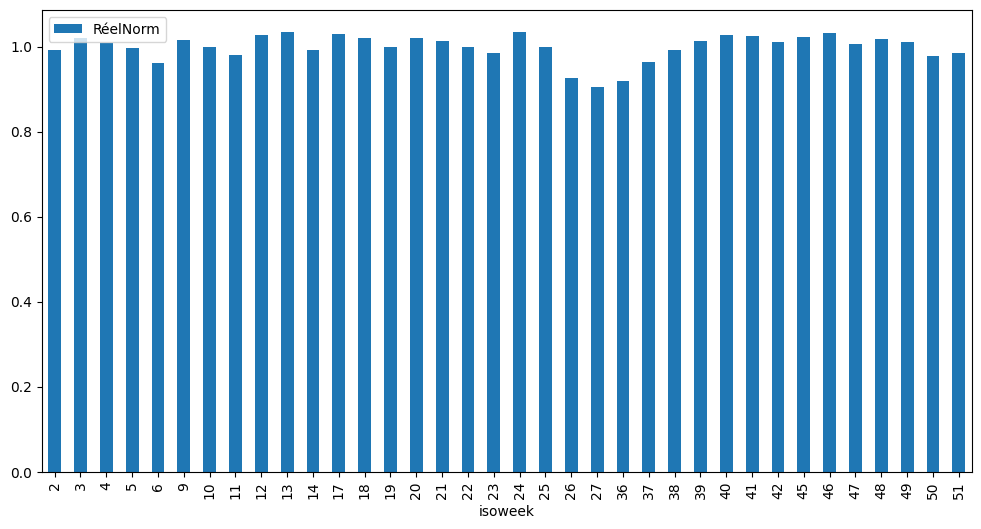

In [83]:
df[df['an']==2019][['isoweek','RéelNorm']].groupby('isoweek').median().plot(kind='bar', figsize=(12,6))

<AxesSubplot:xlabel='isoweek'>

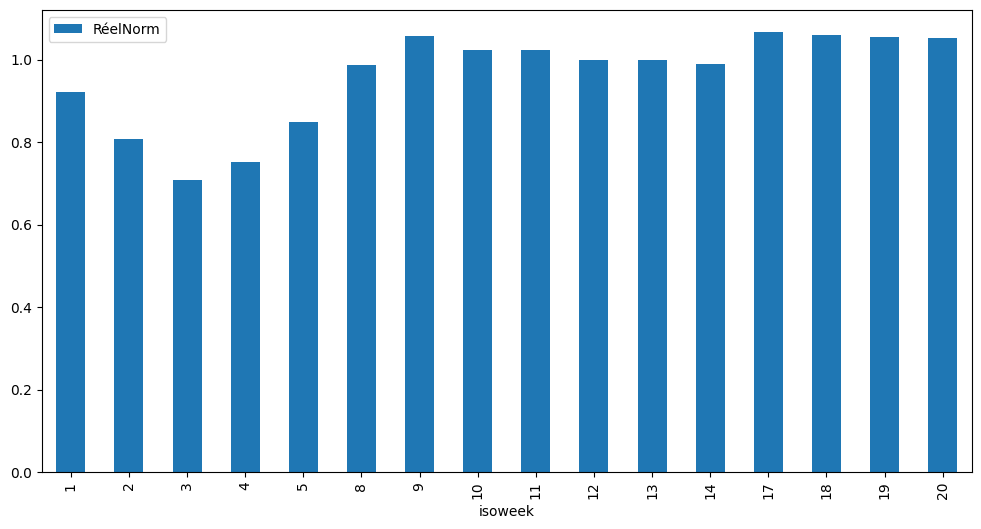

In [84]:
df[df['an']==2022][['isoweek','RéelNorm']].groupby('isoweek').median().plot(kind='bar', figsize=(12,6))

Clairement, le paramètre isoweek semble intervenir même si les variation de la fréquentation sont assez faibles.
La semaine 27 plutôt faible correspond à la fin de l'année scolaire. La semaine 44 plus forte correspond à la Toussaint.

<AxesSubplot:xlabel='isoweek'>

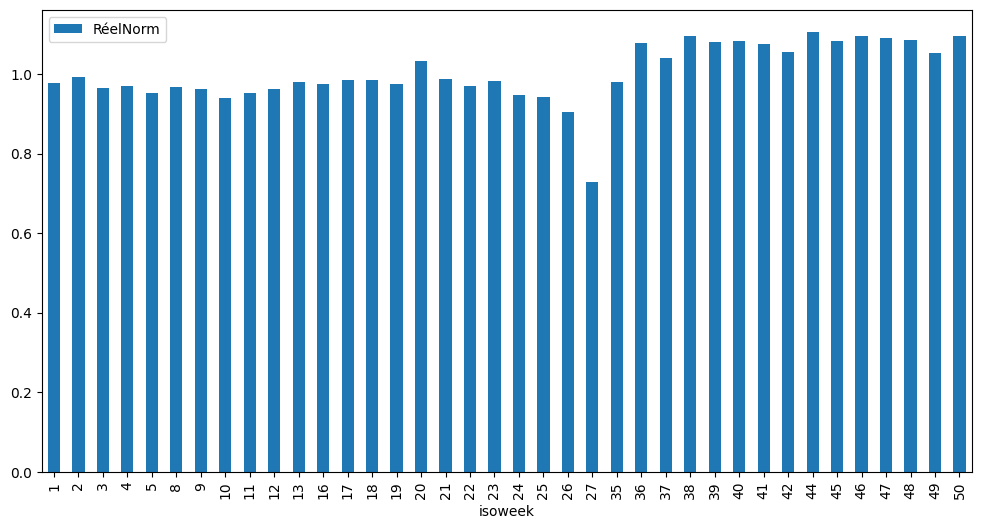

In [89]:
df[df['an']==2016][['isoweek','RéelNorm']].groupby('isoweek').median().plot(kind='bar', figsize=(12,6))

<AxesSubplot:xlabel='mois'>

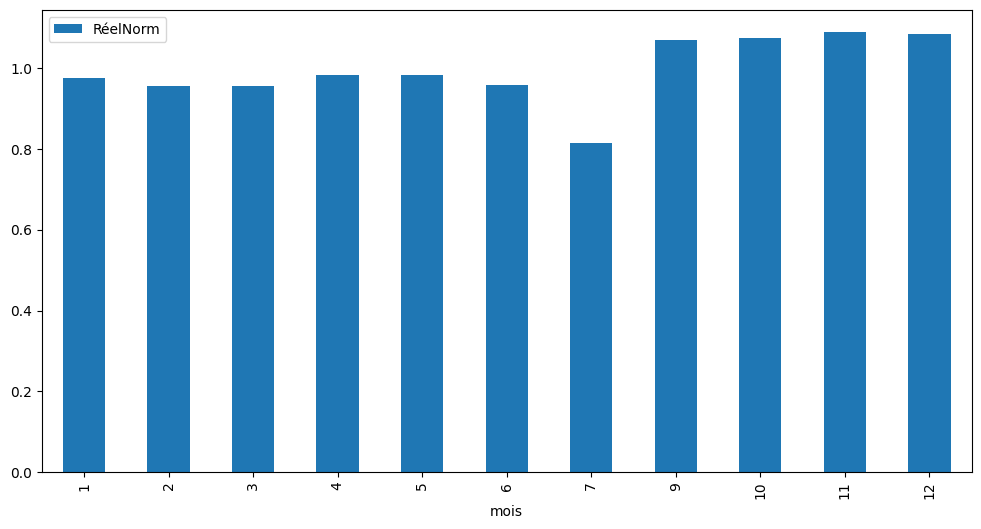

In [90]:
df[df['an']==2016][['mois','RéelNorm']].groupby('mois').median().plot(kind='bar', figsize=(12,6))

<AxesSubplot:xlabel='joursem'>

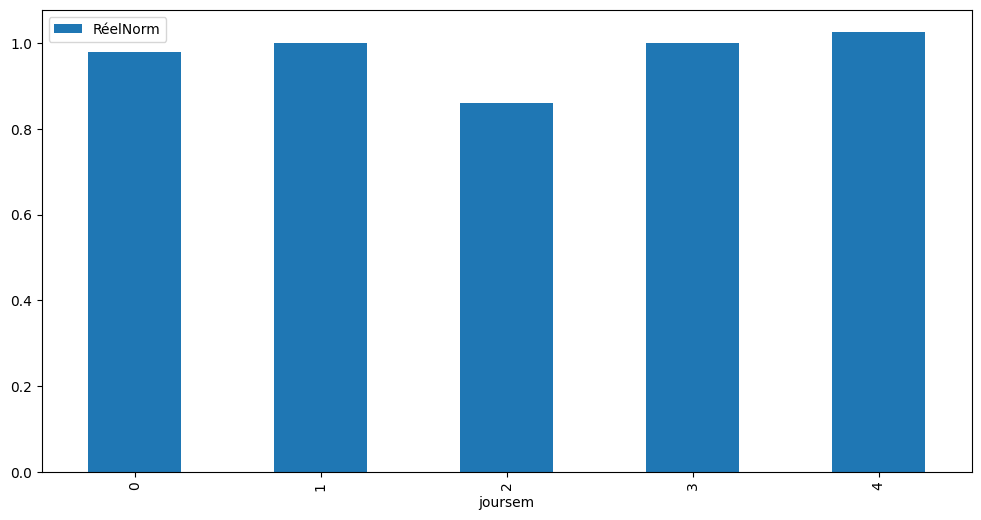

In [ ]:
df_NormVsJsem = df[['joursem','RéelNorm']].groupby('joursem').median()
df_NormVsJsem.plot(kind='bar', figsize=(12,6))

In [ ]:
df_NormVsJsem.head()

,RéelNorm
joursem,
0,0.979866
1,1.000000
2,0.862069
3,1.000000
4,1.027027


La fréquentation est clairement moindre le mercredi.

<AxesSubplot:xlabel='mois'>

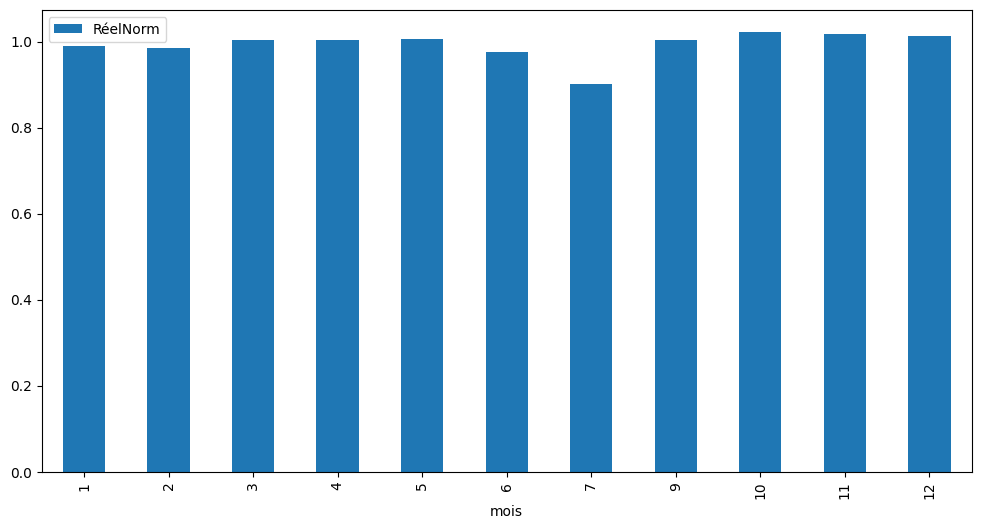

In [ ]:
df_NormVsMois = df[['mois','RéelNorm']].groupby('mois').median()
df_NormVsMois.plot(kind='bar', figsize=(12,6))

In [ ]:
df_NormVsMois.head(12)

,RéelNorm
mois,
1,0.989247
2,0.985542
3,1.004396
4,1.003906
5,1.006897
6,0.975369
7,0.901235
9,1.004630
10,1.022472


<AxesSubplot:xlabel='an'>

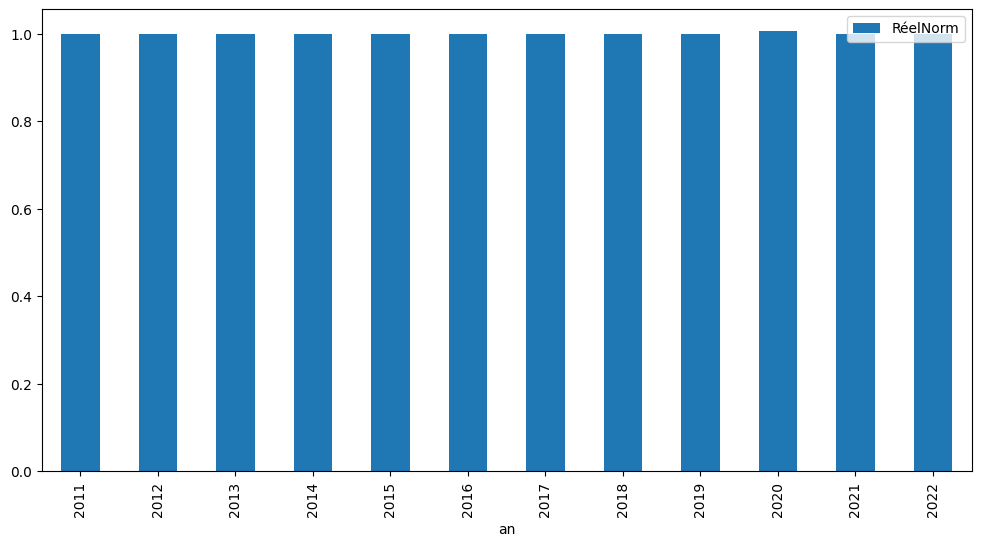

In [ ]:
df_NormVsAn = df[['an','RéelNorm']].groupby('an').median()
df_NormVsAn.plot(kind='bar', figsize=(12,6))

In [ ]:
df_NormVsAn.head(12)

,RéelNorm
an,
2011,1.000000
2012,1.000000
2013,1.000000
2014,1.000000
2015,1.000000
2016,1.000000
2017,1.000000
2018,1.000000
2019,1.000000


<AxesSubplot:xlabel='Type de site'>

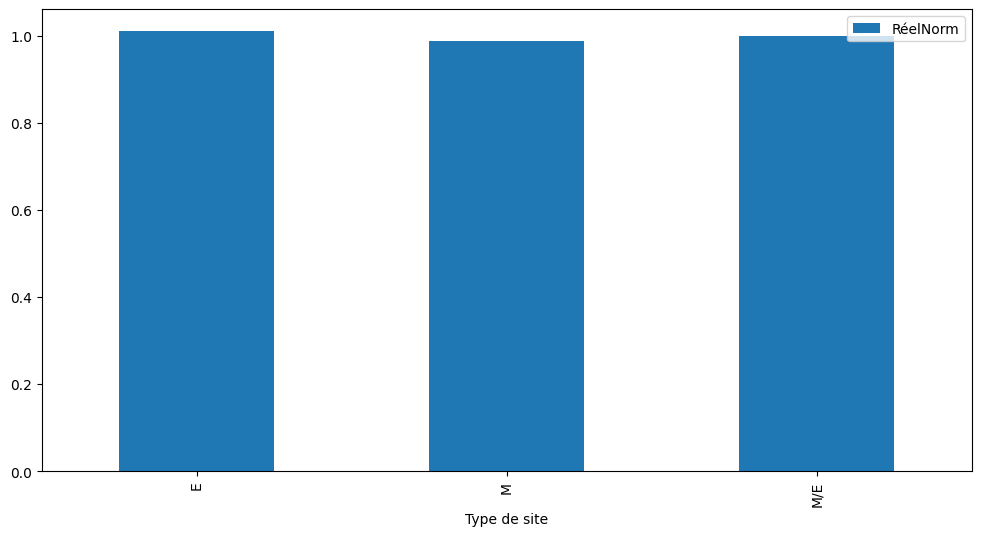

In [ ]:
df_NormVsTSite = df[['Type de site','RéelNorm']].groupby('Type de site').median()
df_NormVsTSite.plot(kind='bar', figsize=(12,6))

In [ ]:
df_NormVsTSite.head()

,RéelNorm
Type de site,
E,1.011050
M,0.988095
M/E,1.000000


In [ ]:
df_EtsTaille=round((df[['Nom du site','Réel']].groupby('Nom du site').median())/50)

In [ ]:
df.head()

,RowNo,Type de site,Date,Prévision,Réel,Nom du site,An,RéelMed,RéelNorm,an,mois,jour,joursem,isoweek,taille
0,0,M/E,2011-09-06,290.0,271.0,LEDRU ROLLIN/SARAH BERNHARDT,2011,308.0,0.879870,2011,9,6,1,36,NaN
1,1,M/E,2011-09-05,95.0,102.0,BEAUJOIRE,2011,129.0,0.790698,2011,9,5,0,36,NaN
2,2,M/E,2011-09-05,167.0,171.0,CONTRIE,2011,211.0,0.810427,2011,9,5,0,36,NaN
3,3,M,2011-09-05,80.0,64.0,COUDRAY M.,2011,77.0,0.831169,2011,9,5,0,36,NaN
4,4,M,2011-09-05,73.0,77.0,FONTENY,2011,92.0,0.836957,2011,9,5,0,36,NaN


In [ ]:
df.drop('taille',axis=1)

,RowNo,Type de site,Date,Prévision,Réel,Nom du site,An,RéelMed,RéelNorm,an,mois,jour,joursem,isoweek
0,0,M/E,2011-09-06,290.0,271.0,LEDRU ROLLIN/SARAH BERNHARDT,2011,308.0,0.879870,2011,9,6,1,36
1,1,M/E,2011-09-05,95.0,102.0,BEAUJOIRE,2011,129.0,0.790698,2011,9,5,0,36
2,2,M/E,2011-09-05,167.0,171.0,CONTRIE,2011,211.0,0.810427,2011,9,5,0,36
3,3,M,2011-09-05,80.0,64.0,COUDRAY M.,2011,77.0,0.831169,2011,9,5,0,36
4,4,M,2011-09-05,73.0,77.0,FONTENY,2011,92.0,0.836957,2011,9,5,0,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127164,130303,M,2017-06-23,43.0,36.0,CAMILLE CLAUDEL,2017,58.0,0.620690,2017,6,23,4,25
127165,130304,M/E,2017-06-23,278.0,312.0,LONGCHAMP,2017,352.0,0.886364,2017,6,23,4,25
127166,130305,E,2017-06-23,96.0,108.0,MULOTIERE,2017,156.0,0.692308,2017,6,23,4,25
127167,130306,M,2017-06-23,106.0,107.0,GASTON SERPETTE M,2017,98.5,1.086294,2017,6,23,4,25


<AxesSubplot:xlabel='isoweek'>

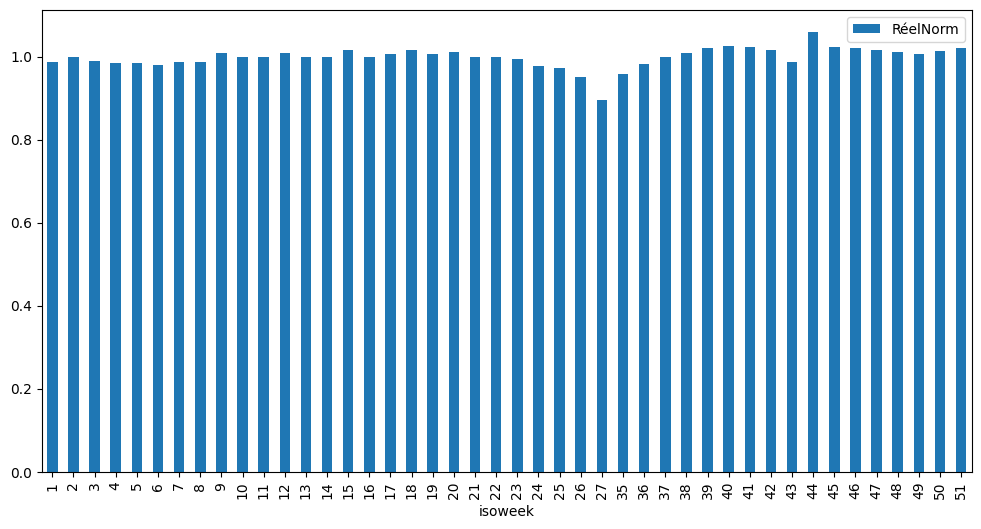

In [ ]:
df_NormVsSel = df[['isoweek','RéelNorm']].groupby('isoweek').median()
df_NormVsSel.plot(kind='bar', figsize=(12,6))

<AxesSubplot:xlabel='isoweek'>

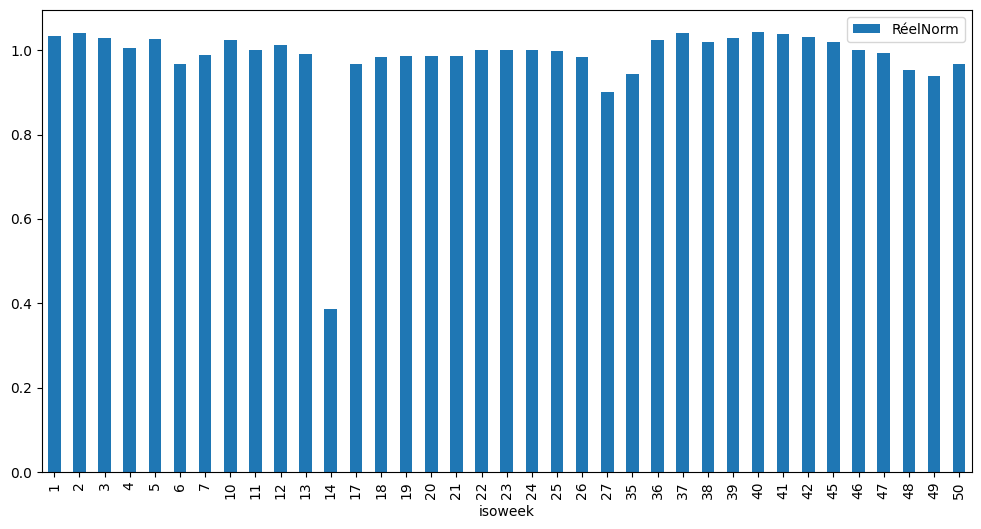

In [ ]:
df[df['An']==2021][['isoweek','RéelNorm']].groupby('isoweek').median().plot(kind='bar', figsize=(12,6))

<AxesSubplot:xlabel='isoweek'>

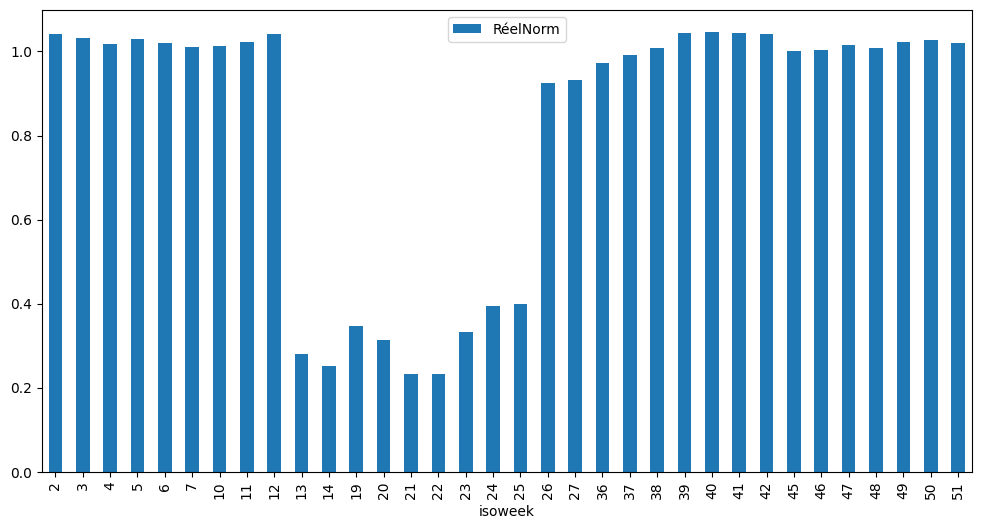

In [ ]:
df[df['An']==2020][['isoweek','RéelNorm']].groupby('isoweek').median().plot(kind='bar', figsize=(12,6))

<AxesSubplot:xlabel='isoweek'>

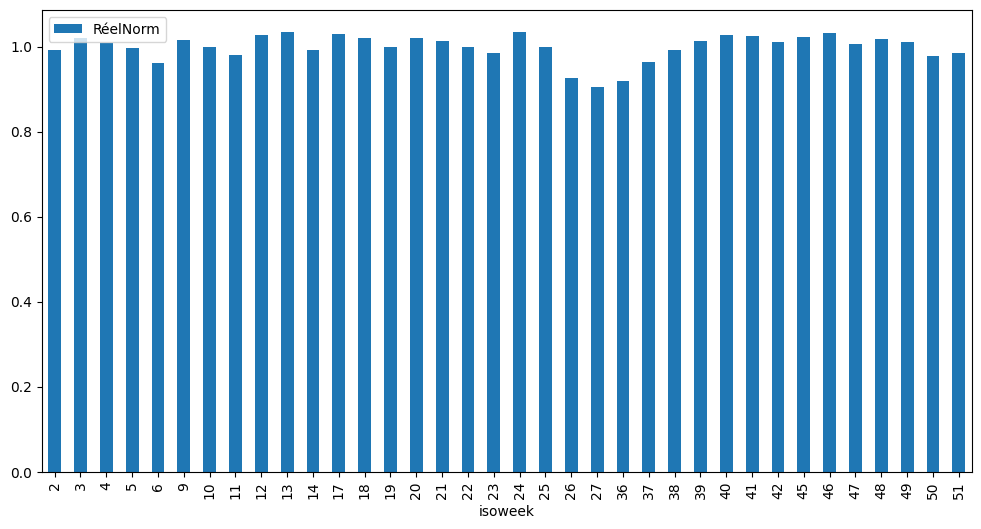

In [ ]:
df[df['An']==2019][['isoweek','RéelNorm']].groupby('isoweek').median().plot(kind='bar', figsize=(12,6))

<AxesSubplot:xlabel='isoweek'>

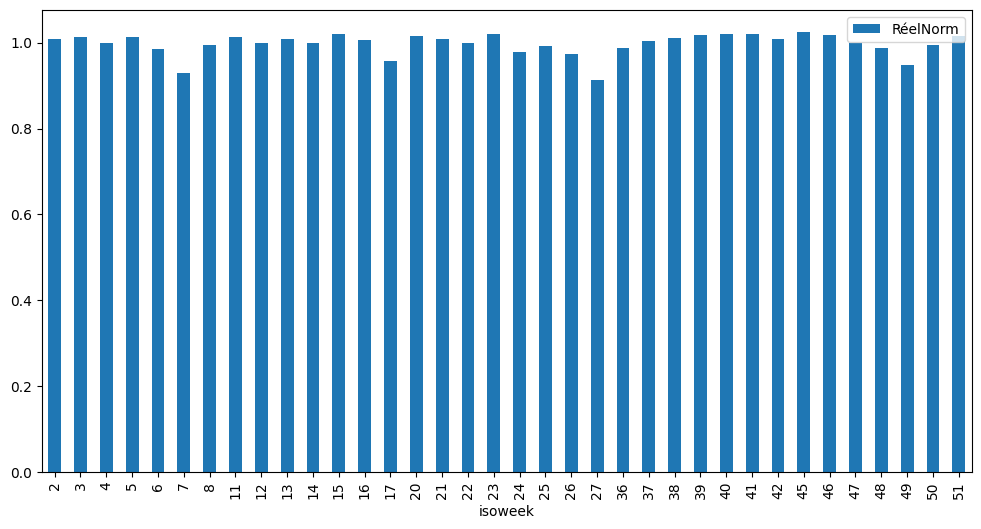

In [ ]:
df[df['An']==2018][['isoweek','RéelNorm']].groupby('isoweek').median().plot(kind='bar', figsize=(12,6))

<AxesSubplot:xlabel='Date'>

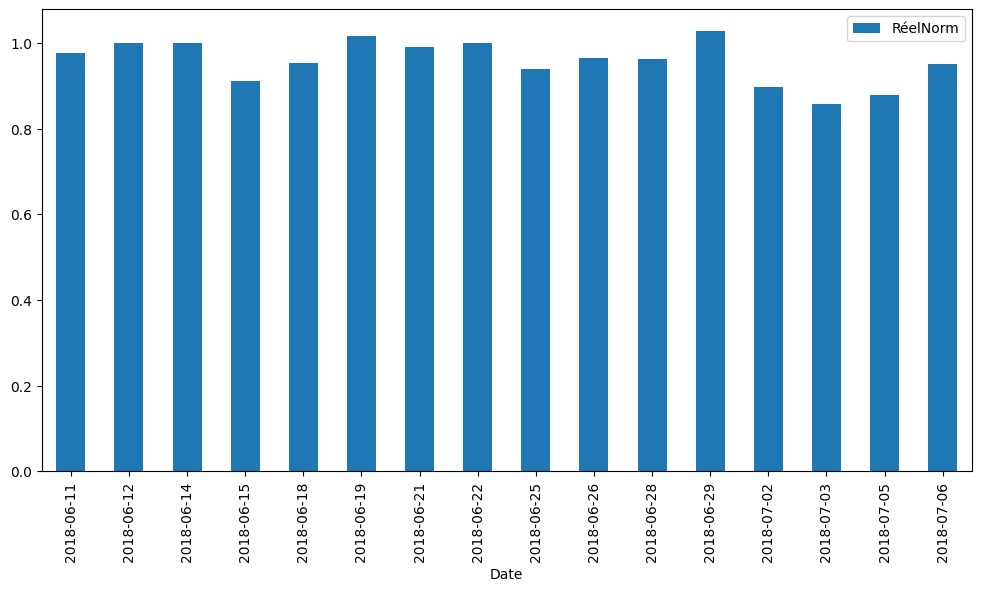

In [ ]:
df[((df['An']==2018) & (df['isoweek'].isin([24,25,26,27])))][['Date','RéelNorm']].groupby('Date').median().plot(kind='bar', figsize=(12,6))

<AxesSubplot:xlabel='Date'>

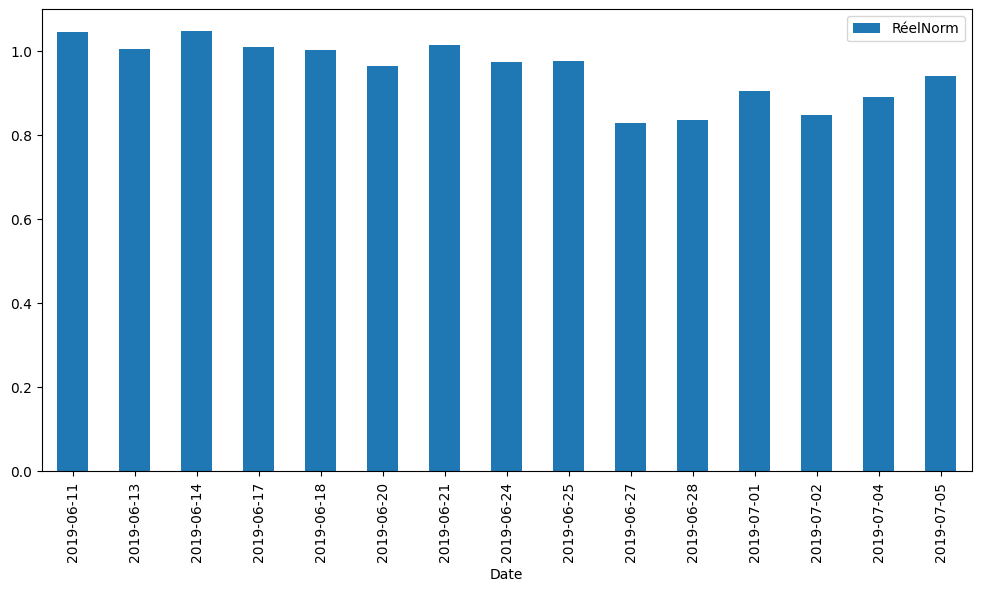

In [ ]:
df[((df['An']==2019) & (df['isoweek'].isin([24,25,26,27])))][['Date','RéelNorm']].groupby('Date').median().plot(kind='bar', figsize=(12,6))

<AxesSubplot:xlabel='Date'>

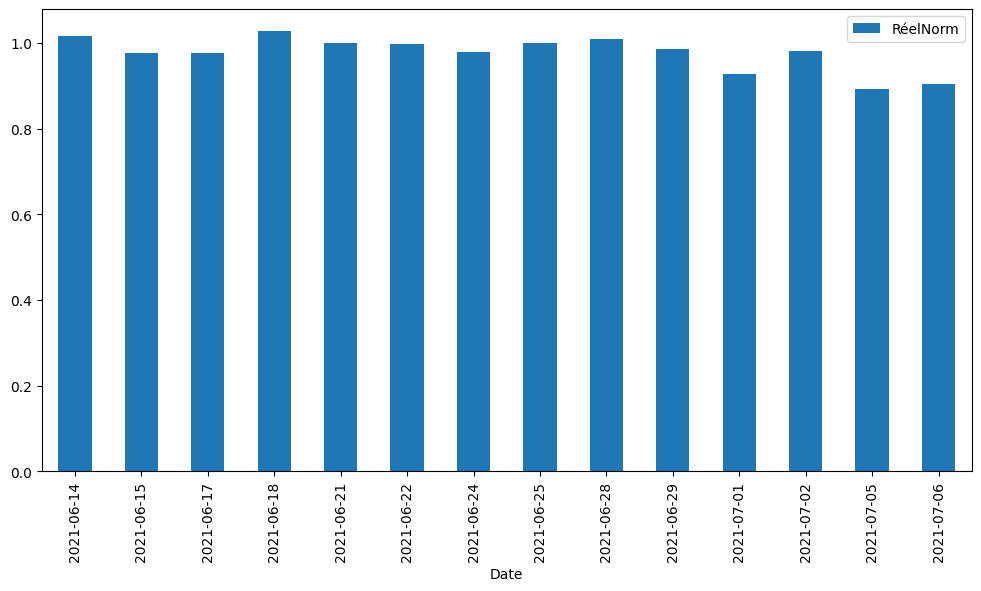

In [ ]:
df[((df['An']==2021) & (df['isoweek'].isin([24,25,26,27,28])))][['Date','RéelNorm']].groupby('Date').median().plot(kind='bar', figsize=(12,6))

<AxesSubplot:xlabel='isoweek'>

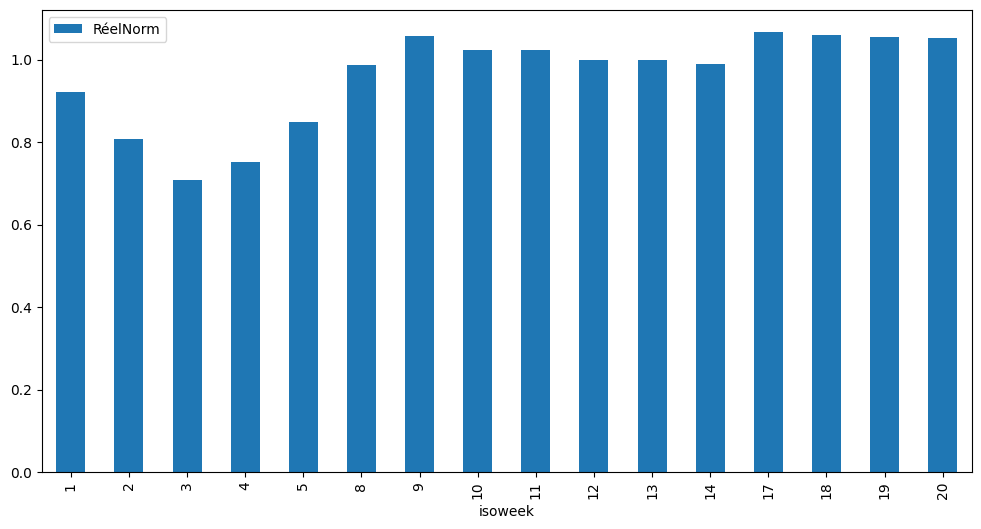

In [ ]:
df[df['An']==2022][['isoweek','RéelNorm']].groupby('isoweek').median().plot(kind='bar', figsize=(12,6))